# First Deep Neural Network (DNN)

This notebook follows along with the lecture on your first DNN as well as the advanced topics lecture.

It uses a very simple data set and model. The data is a Pima Indians onset of diabetes dataset. It has a
number of factors and tests as input variables with a simple binary classification as output
(1 = onset of diabetes, 0 = no onset of diabetes). It is originally from the National Institute of
Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically
predict whether or not a patient has the on-set of diabetes, based on certain diagnostic measurements
included in the dataset.

The data is in csv format at the following URL: 

https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

This lecture will be using a very simple 3 layer Fully Connected Network (FCN) as our model.
We'll walk through the steps of training a NN using <a href="https://www.tensorflow.org/">Tensorflow</a>
from <a href="https://www.anaconda.com/">Anaconda</a>. For building and training models,
<a href="https://www.tensorflow.org/guide/keras">Tensorflow.keras</a> will be used.

---

# Checking Tensorflow and Keras vesion and getting matplotlib ready

The first step is to determine the installed versions of Tensorflow and tensorflow.keras.

In [5]:
import tensorflow as tf
print(tf.__version__)

2.8.0



Next, let's look for the presence of GPUs on our system.



In [6]:
!nvidia-smi

Wed Mar  2 21:49:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |    264MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

And make sure the GPU device is detected by Tensorflow.

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16027091427301694550
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13170458385958288636
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


For graphs and visualization, we'll start out using <a href="https://matplotlib.org/">matplotlib</a>.
Let's set up matplotlib to plot inside the notebook using a Jupyter "magic" command.

In [8]:
%matplotlib inline

## FCN Model:

Let's upload the dataset for our model.

https://raw.githubusercontent.com/keipertk/fdnn/master/pima-indians-diabetes.data.csv

In [9]:
from google.colab import files
files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv


{'pima-indians-diabetes.data.csv': b'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.351,31,0\n8,183,64,0,0,23.3,0.672,32,1\n1,89,66,23,94,28.1,0.167,21,0\n0,137,40,35,168,43.1,2.288,33,1\n5,116,74,0,0,25.6,0.201,30,0\n3,78,50,32,88,31.0,0.248,26,1\n10,115,0,0,0,35.3,0.134,29,0\n2,197,70,45,543,30.5,0.158,53,1\n8,125,96,0,0,0.0,0.232,54,1\n4,110,92,0,0,37.6,0.191,30,0\n10,168,74,0,0,38.0,0.537,34,1\n10,139,80,0,0,27.1,1.441,57,0\n1,189,60,23,846,30.1,0.398,59,1\n5,166,72,19,175,25.8,0.587,51,1\n7,100,0,0,0,30.0,0.484,32,1\n0,118,84,47,230,45.8,0.551,31,1\n7,107,74,0,0,29.6,0.254,31,1\n1,103,30,38,83,43.3,0.183,33,0\n1,115,70,30,96,34.6,0.529,32,1\n3,126,88,41,235,39.3,0.704,27,0\n8,99,84,0,0,35.4,0.388,50,0\n7,196,90,0,0,39.8,0.451,41,1\n9,119,80,35,0,29.0,0.263,29,1\n11,143,94,33,146,36.6,0.254,51,1\n10,125,70,26,115,31.1,0.205,41,1\n7,147,76,0,0,39.4,0.257,43,1\n1,97,66,15,140,23.2,0.487,22,0\n13,145,82,19,110,22.2,0.245,57,0\n5,117,92,0,0,34.1,0.337,38,0\n5,109,75,26,0,36.0,0.546

---

The lecture covers seven steps of training a NN model. It also walks through
the development of the Python code using Keras to perform the training.
The final code is presented below.

In [10]:
# Create first network with Keras

import numpy
import matplotlib.pyplot as plt
import tensorflow as tf

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, epochs=150, batch_size=10,  verbose=1)

# calculate predictions
predictions = model.predict(X)

# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

Epoch 1/150
77/77 [==============================] - 4s 3ms/step - loss: 0.6832 - accuracy: 0.6432
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6510
Epoch 3/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6510
Epoch 4/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6510
Epoch 5/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6497
Epoch 6/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6562
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6615
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6654
Epoch 9/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.6966
Epoch 10/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6810
Epoch 11/

There is a simple command to get an ASCII summary of the model. Run the
command below to see the output

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


When the training is done, the results are stored in the dictionary "history". The command below lists the keys in the dictionary.

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


Next, let's plot the training history of accuracy ("accuracy") and the loss function ("loss"). First, let's plot the accuracy.

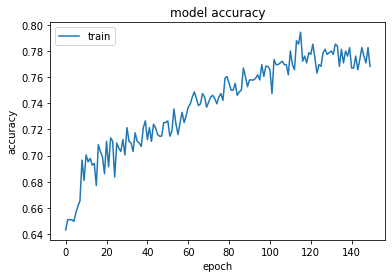

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Next let's plot the loss as a function of the epoch.

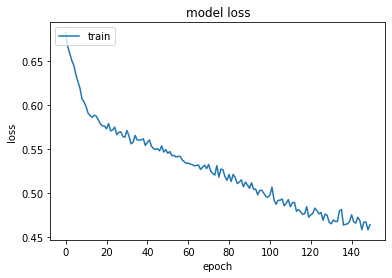

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## End of First Lecture

This marks the end of the first lecture. The next part of this notebook goes along with the second lecture on more "advanced" topics with DNN's and Keras.

---

## What is the Keras Ouput telling us? And how can we get more performance timings?

I usually run Keras with the option "verbose=1" to get a little more information. The output from Keras is
fairly compact but provides some good information.

The code below is the "final" code used in the previous lecture. Go ahead and run it, paying attention to the
output.

In [15]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Model.summary
print("Model Summary:")
model.summary()
print(" ")

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, epochs=150, batch_size=10,  verbose=1)

# calculate predictions
predictions = model.predict(X)

# Plots
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
 
Epoch 1/150
77/77 [==============================] - 1s 3ms/step - loss: 0.6781 - accuracy: 0.6510
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6510
Epoch 3/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6510
Epoch 

KeyError: ignored

A sample output line for an epoch looks like the following:
    
    

Epoch 7/150
768/768 [==============================] - 0s 366us/step - loss: 0.6190 - accuracy: 0.6510 



The first line tells which epoch is being process and the total number of epochs.

The second line gives you a progress bar so you know how the epoch is processing. This is followed by
the amount of time spent doing the training for a "step" in that epoch. In the above case, it took 0 seconds
(it was actually under 1 second and the output can only print in seconds increments). This is followed
by the average time per input catch. For this example is was 366 microseconds (366 us/step).

Finally, <tt>tf.keras</tt> outputs the the value of the loss function for that epoch as well as the
accuracy.

This can give some useful information about the model training.

## Total training time

To get total training time, simply use the Python “time” module. The first thing is
to call the time before <tt>model.fit()</tt> method is called. Then you call the time
after <tt>model.fit()</tt>. The difference in time is the time it took to train the
model. The code below adds this timing to our code.

In [16]:
# Create first network with Keras
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import time

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Model.summary
print("Model Summary:")
model.summary()
print(" ")

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
start_time = time.time()
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, verbose=1)
end_time = time.time()

# Plots
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# total training time
print(" ")
print("Total training time = ",(end_time - start_time)," seconds")


Model Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
 
Epoch 1/150
62/62 [==============================] - 1s 8ms/step - loss: 0.6807 - accuracy: 0.6433 - val_loss: 0.6680 - val_accuracy: 0.6429
Epoch 2/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.6564 - val_loss: 0.6662 - val_accuracy: 0.6364
Epoch 3/150
62/62 [==

KeyError: ignored

## Times for each epoch.

Another metric we might be interested in is how can you easily capture the time for each epoch?

tf.keras has the concept of “callback” function(s)
(https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback). You can use
callbacks to get a view on internal states and statistics of the model during training. You
pass a list of callback functions to the <tt>fit</tt> method of the <tt>sequential</tt> or <tt>model</tt>
classes. The relevant methods of the callbacks are called at each stage of the training.
We will use the example of a callback in the previous link. It will use the Python time module
to capture epoch times.

Fortunately, Stack Overflow has an elegant solution.

https://stackoverflow.com/questions/43178668/record-the-computation-time-for-each-epoch-in-keras-during-model-fit#43186440

that can be adapted to tensorflow.keras.

The Stack Overflow code uses the same approach as we used for total training time. We call <tt>time()</tt>
before epoch and call <tt>time()</tt> after epoch. The elapsed time is the difference in times. The elapsed
time is stored in the callback object (it is in seconds). The we pass the list of callback
functions to <tt>model.fit()</tt>. Then you can use the epoch time results as you see fit.

The code below computes statistics on the epoch times. It also plots the epoch times.

Epoch 1/150
62/62 [==============================] - 1s 7ms/step - loss: 0.6806 - accuracy: 0.6482 - val_loss: 0.6661 - val_accuracy: 0.6429
Epoch 2/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.6482 - val_loss: 0.6631 - val_accuracy: 0.6494
Epoch 3/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.6515 - val_loss: 0.6507 - val_accuracy: 0.6494
Epoch 4/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.6792 - val_loss: 0.6363 - val_accuracy: 0.6494
Epoch 5/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.6629 - val_loss: 0.6247 - val_accuracy: 0.6948
Epoch 6/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.6694 - val_loss: 0.6228 - val_accuracy: 0.6623
Epoch 7/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6077 - accuracy: 0.6857 - val_loss: 0.6043 - val_accuracy: 0.6883
Epoch 8/150
6

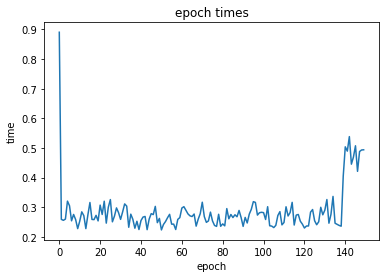

In [17]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import statistics

# callback class to store epoch times
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
# end class

        
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create callback for epoch times
time_callback = TimeHistory()
callbacks_list = [time_callback]

# Fit the model
start_time = time.time()
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=1)
end_time = time.time()

# total training time
print(" ")
print("Total training time = ",(end_time - start_time)," seconds")
print(" ")

# Print out epoch timeings
epoch_times = time_callback.times
min_time = min(epoch_times)
max_time = max(epoch_times)
mean_time = statistics.mean(epoch_times)
median_time = statistics.median(epoch_times)
stdev_time = statistics.stdev(epoch_times)
variance_time = statistics.variance(epoch_times)

print("min epoch time = ",min_time," seconds")
print("max epoch time = ",max_time," seconds")
print("Mean epoch time = ",mean_time," seconds")
print("Median epoch time = ",median_time," seconds")
print("Standard deviation epoch time = ",stdev_time," seconds")
print("Variance epoch time = ",variance_time," seconds")
print(" ")

plt.plot(epoch_times)
plt.title('epoch times')
plt.ylabel('time')
plt.xlabel('epoch')
plt.show()


---

## Visualizing the Model

Getting a print out of the model using, <tt>model.summary()</tt>,
works well enough. However, when the models get complex, it would be good to 
get a better image of the model. There is a function in <tt>tf.keras</tt> that
can do this for us.

Model Summary:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                108       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
 
Epoch 1/150
62/62 [==============================] - 2s 12ms/step - loss: 0.6834 - accuracy: 0.6531 - val_loss: 0.6722 - val_accuracy: 0.6429
Epoch 2/150
62/62 [==============================] - 0s 6ms/step - loss: 0.6628 - accuracy: 0.6531 - val_loss: 0.6663 - val_accuracy: 0.6429
Epoch 3/150
62/62 [=

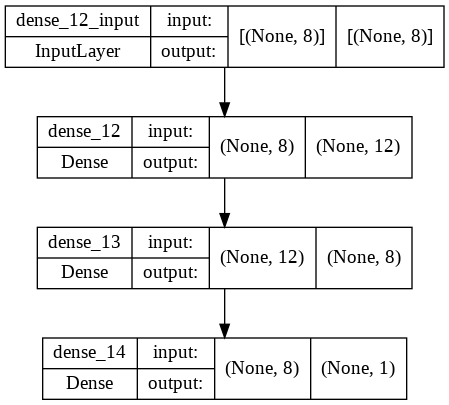

In [18]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Model.summary
print("Model Summary:")
model.summary()
print(" ")

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, verbose=1)

# calculate predictions
predictions = model.predict(X)

# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Need to show image here
from IPython.display import Image
Image("model_plot.png")


---

## Split data into train and test

In the previous training, the entire dataset was used for the training. In general,
we want a portion of the dataset to be used for testing as the model is trained.
This gives us a better view of the accuracy and loss of the training process because
the data is not used in the training. Typically we call this "validation" data. 

<tt>tf.keras</tt> allows us to specify how much of the dataset should be set aside for validation.
It is expressed as a decimal fraction between 0.0 and 0.99 (using 1.0 means the model
would never be trained).

In [19]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, verbose=1)

# calculate predictions
predictions = model.predict(X)

# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)


Epoch 1/150
62/62 [==============================] - 1s 6ms/step - loss: 0.6807 - accuracy: 0.6531 - val_loss: 0.6714 - val_accuracy: 0.6429
Epoch 2/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6531 - val_loss: 0.6714 - val_accuracy: 0.6429
Epoch 3/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6531 - val_loss: 0.6700 - val_accuracy: 0.6429
Epoch 4/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.6531 - val_loss: 0.6677 - val_accuracy: 0.6429
Epoch 5/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.6531 - val_loss: 0.6660 - val_accuracy: 0.6429
Epoch 6/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.6531 - val_loss: 0.6472 - val_accuracy: 0.6429
Epoch 7/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6260 - accuracy: 0.6531 - val_loss: 0.6405 - val_accuracy: 0.6429
Epoch 8/150
6

As with the previous example, let's examine what is in the "history" dictionary.

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Notice that in addition to the training results and metrics, we have the validation results and metrics. These are designated with the "val_" as the first part of the name.

Let's plot both the training and validation results for the accuracy as a function of the epoch. The first plot is the accuracy.

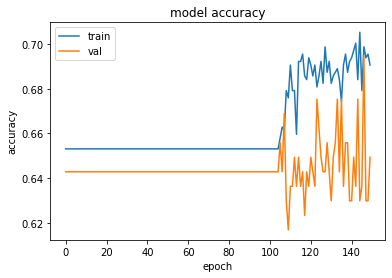

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Let's plot the loss function for both the training data andthe validation data.

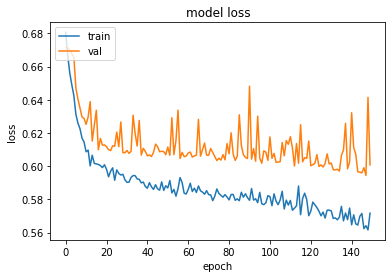

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Create a Checkpoint - weights only, every epoch

The next few sections discuss how to create a checkpoint of the weights and/or model during training.
Sometimes training can take a very long time so it's a good idea to create a checkpoint of the model
periodically. A checkpoint is just the state of the model training at some number of epochs. You can
checkpoint just the weights or the entire model, weights, and the training parameters (loss function,
 optimizer, etc.).

To do this, you use a <tt>callback</tt> function that tf.keras provides,
<a href="https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint">ModelCheckpoint</a>.
It is much simpler than it sounds. You just provide a few inputs including a file name and tf.keras
takes care of the rest.

There are lots of options for creating a check-point. To get started, this first example below creates a
checkpoint at the end of each epoch. Even though this problem is tiny, the number of epochs has been
changed to 10 so you don't end up with a large number of checkpoint files.

The first step in the code is to define the "filepath" (this is the filename of the output file). Then you
use the tf.keras function <tt>ModelCheckpoint</tt> to define the other variables. For this example,
only the weights are saved. The
<tt>verbosity</tt> is set to 1 (you may get a fair amount of output but this preferred to not seeing any
or extremely limited output). Also the option <tt>save_freq</tt> is set to 1 which tells
<tt>tf.keras</tt> to create the checkpoint every epoch. You can change the value of "1" to any integer
you like. For example, setting to 2 would mean that the weights are saved every other epoch. You can also
set it to <tt>"epoch"</tt> that saves the output after every epoch.

The code for the model checkpoint we'll be using looks like the following.
<code>
filepath="weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_freq='epoch')
callbacks_list = [checkpoint]
</code>


For <tt>filepath</tt> we have created a file name that includes the epoch number and the <tt>accuracy</tt>.
An example of a file name might be "weights-improvement-08-0.89.hdf5" where "08" is the epoch number and
"0.89" is the accuracy. Note - the code is using hdf5 as file format.

The second line of code creates a Checkpoint object with a verbosity of 1 so we can see what the
code is doing. It also is only saving the model weights (default) and the period in between saving the
weights is every epoch. For a larger number of epochs you could set the period to something larger,
perhaps 10 or 100.

The third line just adds the checkpoint object to a list of callback functions that are passed to
<tt>tf.keras</tt>. You can provide a list of callback functions if you want.

In this example, it should create 50 files (50 epochs) in the directory where this Jupyter
notebook is located. After running the cell take a look at the directory.

In [25]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))      

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define checkpoint variables
filepath="weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_freq='epoch')
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=50, batch_size=10,
                    callbacks=callbacks_list, verbose=1)

# calculate predictions
predictions = model.predict(X)


Epoch 1/50
55/62 [=========================>....] - ETA: 0s - loss: 0.6890 - accuracy: 0.6164
Epoch 1: saving model to weights-improvement-01-0.62.hdf5
62/62 [==============================] - 1s 6ms/step - loss: 0.6879 - accuracy: 0.6221 - val_loss: 0.6776 - val_accuracy: 0.6429
Epoch 2/50
60/62 [============================>.] - ETA: 0s - loss: 0.6682 - accuracy: 0.6500
Epoch 2: saving model to weights-improvement-02-0.65.hdf5
62/62 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.6531 - val_loss: 0.6660 - val_accuracy: 0.6429
Epoch 3/50
57/62 [==========================>...] - ETA: 0s - loss: 0.6553 - accuracy: 0.6561
Epoch 3: saving model to weights-improvement-03-0.65.hdf5
62/62 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6531 - val_loss: 0.6658 - val_accuracy: 0.6429
Epoch 4/50
49/62 [======================>.......] - ETA: 0s - loss: 0.6548 - accuracy: 0.6449
Epoch 4: saving model to weights-improvement-04-0.65.hdf5
62/62

List all files in current directory.

In [26]:
# https://realpython.com/working-with-files-in-python/
import os

# List all files in a directory using scandir()
basepath = '.'
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            print(entry.name)
        # end if
    # end for
# end with

weights-improvement-38-0.69.hdf5
weights-improvement-45-0.69.hdf5
weights-improvement-37-0.69.hdf5
weights-improvement-15-0.65.hdf5
weights-improvement-17-0.65.hdf5
weights-improvement-12-0.65.hdf5
weights-improvement-50-0.70.hdf5
weights-improvement-44-0.71.hdf5
weights-improvement-18-0.65.hdf5
weights-improvement-40-0.69.hdf5
weights-improvement-01-0.62.hdf5
weights-improvement-02-0.65.hdf5
weights-improvement-24-0.68.hdf5
weights-improvement-32-0.68.hdf5
weights-improvement-05-0.65.hdf5
weights-improvement-26-0.69.hdf5
weights-improvement-43-0.70.hdf5
weights-improvement-31-0.69.hdf5
weights-improvement-35-0.69.hdf5
weights-improvement-39-0.68.hdf5
weights-improvement-06-0.65.hdf5
weights-improvement-23-0.69.hdf5
weights-improvement-03-0.65.hdf5
weights-improvement-27-0.69.hdf5
weights-improvement-28-0.70.hdf5
weights-improvement-47-0.69.hdf5
weights-improvement-36-0.69.hdf5
weights-improvement-48-0.69.hdf5
weights-improvement-19-0.65.hdf5
weights-improvement-08-0.65.hdf5
weights-im

## Check point - only save weights when there is improvement in accuracy

Next, let us checkpoint the weights but only when there is improvement in some important
metric. These are typically one of the metrics we watch to understand how the training is
progressing - loss and accuracy. For this example, we will use "accuracy".

Using this metric, we can create a <tt>ModelCheckpoint</tt> function to save the weights.
Using the options, we can save the weights when <em>there is improvement in accuracy</em>.
The option we use is, <tt>save_best_only=True</tt>. The code for this looks like the following:
                                                                         
                                                                         
filepath="weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_weights_only=True,
                                                monitor="accuracy", save_best_only=True)
callbacks_list = [checkpoint]


Relative to the last example, we're using the option <tt>save_weights_only=True</tt> and to
monitor the "accuracy" of the training. Otherwise, everything is the same.

In [27]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define checkpoint variables
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_weights_only=True,
                                                monitor="accuracy", save_best_only=True)
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

# calculate predictions
predictions = model.predict(X)

# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)


Epoch 1: accuracy improved from -inf to 0.63844, saving model to weights-improvement-01-0.64.hdf5

Epoch 2: accuracy improved from 0.63844 to 0.65309, saving model to weights-improvement-02-0.64.hdf5

Epoch 3: accuracy did not improve from 0.65309

Epoch 4: accuracy did not improve from 0.65309

Epoch 5: accuracy did not improve from 0.65309

Epoch 6: accuracy improved from 0.65309 to 0.66450, saving model to weights-improvement-06-0.65.hdf5

Epoch 7: accuracy did not improve from 0.66450

Epoch 8: accuracy improved from 0.66450 to 0.67101, saving model to weights-improvement-08-0.66.hdf5

Epoch 9: accuracy improved from 0.67101 to 0.68078, saving model to weights-improvement-09-0.68.hdf5

Epoch 10: accuracy improved from 0.68078 to 0.68567, saving model to weights-improvement-10-0.68.hdf5

Epoch 11: accuracy improved from 0.68567 to 0.68893, saving model to weights-improvement-11-0.66.hdf5

Epoch 12: accuracy did not improve from 0.68893

Epoch 13: accuracy did not improve from 0.688

You won't see a file for every epoch, only those where the training accuracy improves.

The files are listed below.

In [28]:
# https://realpython.com/working-with-files-in-python/
import os

# List all files in a directory using scandir()
basepath = '.'
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            print(entry.name)
        # end if
    # end for
# end with

weights-improvement-38-0.69.hdf5
weights-improvement-39-0.69.hdf5
weights-improvement-45-0.69.hdf5
weights-improvement-19-0.68.hdf5
weights-improvement-37-0.69.hdf5
weights-improvement-15-0.65.hdf5
weights-improvement-67-0.75.hdf5
weights-improvement-96-0.77.hdf5
weights-improvement-08-0.66.hdf5
weights-improvement-17-0.65.hdf5
weights-improvement-71-0.71.hdf5
weights-improvement-12-0.65.hdf5
weights-improvement-50-0.70.hdf5
weights-improvement-44-0.71.hdf5
weights-improvement-02-0.64.hdf5
weights-improvement-18-0.65.hdf5
weights-improvement-40-0.69.hdf5
weights-improvement-01-0.62.hdf5
weights-improvement-02-0.65.hdf5
weights-improvement-24-0.68.hdf5
weights-improvement-32-0.68.hdf5
weights-improvement-05-0.65.hdf5
weights-improvement-26-0.69.hdf5
weights-improvement-43-0.70.hdf5
weights-improvement-117-0.79.hdf5
weights-improvement-111-0.73.hdf5
weights-improvement-28-0.68.hdf5
weights-improvement-31-0.69.hdf5
weights-improvement-35-0.69.hdf5
weights-improvement-39-0.68.hdf5
weights-

## Checkpoint - save best weights during training

The next example allows us to save the weights for epoch with the highest accuracy
as the training progresses. There will be only one file that is over-written every
time the accuracy is improved. We only need one file for this so we don't need to
worry about the number of epochs were the improvement occurs or the accuracy.
This is the only change we need to make.

In [29]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define checkpoint variables
filepath="weights-best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_weights_only=True,
                                                monitor="accuracy", save_best_only=True)
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

# calculate predictions
predictions = model.predict(X)

# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

accuracy: 77.60%

Epoch 1: accuracy improved from -inf to 0.65309, saving model to weights-best.hdf5

Epoch 2: accuracy did not improve from 0.65309

Epoch 3: accuracy did not improve from 0.65309

Epoch 4: accuracy did not improve from 0.65309

Epoch 5: accuracy did not improve from 0.65309

Epoch 6: accuracy did not improve from 0.65309

Epoch 7: accuracy did not improve from 0.65309

Epoch 8: accuracy did not improve from 0.65309

Epoch 9: accuracy did not improve from 0.65309

Epoch 10: accuracy did not improve from 0.65309

Epoch 11: accuracy did not improve from 0.65309

Epoch 12: accuracy did not improve from 0.65309

Epoch 13: accuracy did not improve from 0.65309

Epoch 14: accuracy did not improve from 0.65309

Epoch 15: accuracy did not improve from 0.65309

Epoch 16: accuracy did not improve from 0.65309

Epoch 17: accuracy did not improve from 0.65309

Epoch 18: accuracy did not improve from 0.65309

Epoch 19: accuracy did not improve from 0.65309

Epoch 20: accuracy did n

## Load checkpoint and evaluate

We can now check-point the training of our model based on various conditions. It would
be really nice to be to be able to reuse the saved weights or model in some fashion.
For example, this would allow you to examine the model and the training history or perhaps
restart the training if you want (perhaps you can change the training parameters to
increase the training rate or improve the accuracy, etc.).

This first example is simple - it just reloads the save weights from the last example,
which save the "best" weights, corresponding the best value of accuracy, and evaluates
this model for these weights.

There are a couple of steps we need to take to our code to reload the saved model weights.
The first one is that we need to re-create the model that corresponds to the weights since
we didn't save the entire model. An easy way to do this is to simply just re-define the
model. The code for this is below.



*model = tf.keras.models.Sequential()*
*model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))*
*model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))*
*model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))*



Next, we load the weights using the <tt>model.load_weights</tt> function where "model" is our
recreated model. The code for this is also simple.


*model.load_weights("weights-best.hdf5")*


Next we "compile" the model and then load the "dataset" or the original input file.
Note - you can load any data set you want as along as it is in the same "form" as the
original data set. As an aside this would be an opportunity to load data that the model
has never seen so you can evaluation its performance.

In this example, after the model is redefined and the weights are loaded, we "evaluate" the
model with the saved weights. For this we use the function <tt>mode.evaluate</tt>. Then we
print the "score" for the data. 

In [30]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# load weights
model.load_weights("weights-best.hdf5")

# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 70.83%


## Reload check point and continue training

The last example just "evaluated" the "best" model weights once they were loaded.
No further training was done. But what if we <strong>wanted</strong> to continue
training the model. How would we do this?

The process is very similar to the last example. We first recreate the model and
load the original input data. We next compile the model with the training parameters
we want to use. These can be different than the ones used in the previous training(s).
Do not forget to redefine the <tt>ModelCheckpoint</tt> function because we may want to
check-point the model during the training.

Finally we call the function <tt>model.fit</tt> to start the training. For this case
a total 150 epochs are used.

For this particular example, at the end of training, the various entries in the
input data set are evaluated and their corresponding "score", or <strong>accuracy</strong>
in this case, are printed.

In [31]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# load weights
model.load_weights("weights-best.hdf5")

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define checkpoint variables
filepath="weights-best-new.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, monitor="val_accuracy", 
                                                save_best_only=True, mode="max")
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=1)

# calculate predictions
predictions = model.predict(X)

# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

accuracy: 70.83%
Epoch 1/150
55/62 [=========================>....] - ETA: 0s - loss: 0.5460 - accuracy: 0.7218
Epoch 1: val_accuracy improved from -inf to 0.68831, saving model to weights-best-new.hdf5
62/62 [==============================] - 1s 6ms/step - loss: 0.5446 - accuracy: 0.7182 - val_loss: 0.5843 - val_accuracy: 0.6883
Epoch 2/150
55/62 [=========================>....] - ETA: 0s - loss: 0.5492 - accuracy: 0.7055
Epoch 2: val_accuracy did not improve from 0.68831
62/62 [==============================] - 0s 4ms/step - loss: 0.5426 - accuracy: 0.7117 - val_loss: 0.5737 - val_accuracy: 0.6753
Epoch 3/150
61/62 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7213
Epoch 3: val_accuracy did not improve from 0.68831
62/62 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7215 - val_loss: 0.5733 - val_accuracy: 0.6883
Epoch 4/150
59/62 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7102
Epoch 4: val_accuracy d

Notice that the code saves the best weights as before. We're writing to the same
file over-writing the previous weights. If you want to save the previous weights make
a copy before running the code.

# New TF Functions - tf.keras.models.save_model

https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model

Saves a model as a TensorFlow SavedModel or HDF5 file.


tf.keras.models.save_model(
    model, filepath, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None
)

The saved model contains:

- the model's configuration (topology)
- the model's weights
- the model's optimizer's state (if any)

Thus the saved model can be reinstantiated in the exact same state, without
any of the code used for model definition or training.


https://www.tensorflow.org/tutorials/keras/save_and_load


---

## Visualizing Accuracy in real-time

Creating plots of the training history is nice, but so far we can only do that
<em>after</em> the training is completed. Plotting the "history" is always very
useful but there is nothing like seeing the training history to date as the
training progresses.



There is a Python module that can integrate with <tt>tf.keras</tt> that can do
real-time plotting. <a href="https://github.com/stared/livelossplot/">Linelossplot</a>
is a module that has functions that can do this for you. At this time (April 2020)
Anaconda cannot install it, but <tt>pip</tt> can. I would not worry too much about
mixing Anaconda and pip.

In the example below, we will use livelossplot for our simple example with 150 epochs.

In [33]:
!pip install livelossplot

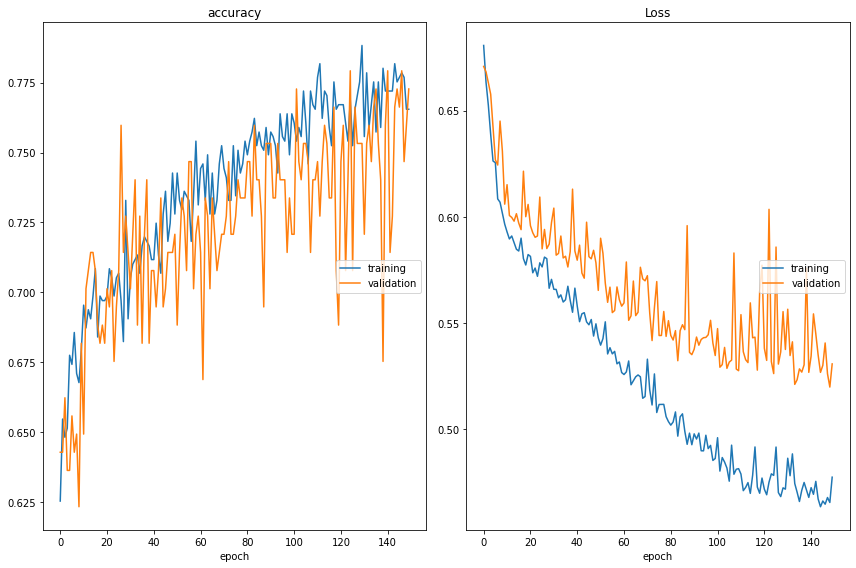

accuracy
	training         	 (min:    0.625, max:    0.788, cur:    0.765)
	validation       	 (min:    0.623, max:    0.779, cur:    0.773)
Loss
	training         	 (min:    0.464, max:    0.681, cur:    0.477)
	validation       	 (min:    0.520, max:    0.671, cur:    0.531)
62/62 [==============================] - 1s 12ms/step - loss: 0.4775 - accuracy: 0.7655 - val_loss: 0.5308 - val_accuracy: 0.7727


In [34]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from livelossplot.keras import PlotLossesCallback

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

callbacks_list = [PlotLossesCallback()]

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=1)


---

# Work in Progress

## Visualize Activations with keract

$ pip install keract

In [ ]:
!pip install keract

In [35]:
# Create first network with Keras

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_weights_only=True,
#                                               monitor="val_accuracy", save_best_only=True, mode="max")
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from keract import get_activations


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, verbose=1)

ModuleNotFoundError: ignored

In [ ]:
from keract import get_activations

activations = get_activations(model, x, layer_name)
#keract.get_activations(model, x, layer_name=None, nodes_to_evaluate=None, output_format='simple',
#                       auto_compile=True)

#where model is the model object, x is the input (numpy array), and layer_name is the layer to get activations
#for if youonly want the activations for one layer (it is optional)

activation - a dictionary mapping layers to their activations (the output of get_activations)



## Pattern for Defining Layers

So far the code has defined each layer with one line of code. This works extremely well and keeps the code compact but it can make understanding the model a bit more difficult. We've been dealing with Perceptron models so far so understanding them isn't too difficult, but for more complicated networks it would be good to build the model with clarity in mind.

One possibility for improving clarity is to build each layer in the model with several statements. As an example, let's start with our existing model definition.

In [ ]:
# Create first network with Keras

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_weights_only=True,
#                                               monitor="val_accuracy", save_best_only=True, mode="max")

from keras.models import Sequential
from keras.layers import Dense

# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.summary()

Note: You may have to run the cell twice to get a summary of the model.

Notice that each layer gets one line in the model summary. As mentioned previously, if you have a large model, this compactness makes it much easier to read the model.

For the sake of clarity, let's try creating the mode layers with more than one line of code. This will require us to import some modules from Keras.

In [ ]:
# Create first network with Keras

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform', activation='relu'))
#model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_weights_only=True,
#                                               monitor="val_accuracy", save_best_only=True, mode="max")

# Need to fix!!!
from keras.layers.core import Dense, Dropout, Activation

# create model - need to fix!!!
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.summary()

Note that by defining the activation function with a different line of code. This allows you to separate the layers with activation functions, which can help clarity. The final decision is up to you, but this gives you something to think about when defining the models.

## Dead Neurons

## Using A GPU

From: "https://keras.io/getting-started/faq/#how-can-i-run-keras-on-gpu"
“If you are running on the TensorFlow or CNTK backends, your code will automatically run on GPU
if any available GPU is detected.”

"https://kawahara.ca/select-single-gpu-keras/"

https://medium.com/@ab9.bhatia/set-up-gpu-accelerated-tensorflow-keras-on-windows-10-with-anaconda-e71bfa9506d1

To run with a CPU only:
https://stackoverflow.com/questions/40690598/can-keras-with-tensorflow-backend-be-forced-to-use-cpu-or-gpu-at-will

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

-or-

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'






In [ ]:
import os
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
import time

# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]=""; 
# CPU only
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"; 

#print("Available GPUs = ",tensorflow_backend._get_available_gpus() )
print("local devices = ",device_lib.list_local_devices() )
print(" ")

# https://www.tensorflow.org/api_docs/python/tf/config/list_physical_devices
print("list_physical_devices", tf.config.list_physical_devices(device_type=None) )
print(" ")

# https://www.tensorflow.org/guide/gpu
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# https://www.tensorflow.org/guide/gpu
#tf.debugging.set_log_device_placement(True)

try:
    # Specify an invalid GPU device
    with tf.device('/device:GPU:0'):
        a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
        b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
        c = tf.matmul(a, b)
    # end with
except RuntimeError as e:
    print(e)
# end try/except


